## Homework 1: Exploratory Data Analysis

***

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
- Typically filled in by Instructor.
***

### Assignment Overview
In this assignment, you will analyze an ALTERED copy of the “Our World in Data COVID-19” dataset.
- This dataset was pulled on 1/24/22 from: https://ourworldindata.org/coronavirus-source-data
  - See also GitHub: https://github.com/owid/covid-19-data/tree/master/public/data/
- The dataset file is named: **owid-covid-data-2021-ALTERED.csv**

**The data has been altered slightly for use in course assignments,etc.:**
- A unique RECID has been added.
- Some records have been duplicated.
- Some records have been removed.
- Some attribute values have been deleted.
- Some attribute values have been set to incorrect values.
**DO NOT PUBLISH THIS DATASET - it contains intentionally wrong data!**

This notebook template covers the **first three of the six steps** of the **CRISP-DM process model** (Business Understanding, Data Understanding, Data Preparation). (See, for example: https://medium.com/@priaditeguhw/crisp-dm-brief-explanation-and-example-f0d8bc923ed5)

The **objectives** of this assignment are:
- By analyzing and thinking critically about the data, you may identify interesting charcteristics that would be useful when using the data.
- The final, cleaned-up dataset that you create may be used to build classification / regression models in assignments.

### Problem Statement
You have won a $100,000,000,000 (after taxes) lottery jackpot. You have decided to spend some of the winnings on enjoying life, helping friends, etc.  But you also would like to make the world a better place.  After much thought, you have decided to make a donation every month to one or more countries that are heavily impacted by COVID-19, and that lack the resources to deal with the problem.

- You have been told by friends that the “Our World in Data COVID-19” dataset might be a good resource to use for determining the monthly recipient countries.
- You decide to look at the dataset, **explore (understand)** what it contains, and **create (prepare)** a clean dataset from it that contains the kind of information you think might be useful for determining the recipients.
- You do not yet know the specific algorithm, formula or model you will use to determine the recipients.  **That will come in a later step.**

### Things To Do
Complete the sections in the rest of this notebook.  Some intial guidance / sugggestions:
- **Business Understanding**: Fill in the cells, using your thoughts on the specific item.  Your answers will not be graded for "correctness", just "thoughtfulness".  Don't spend a lot of time on it.
- **Data Understanding**: There are lots of semi-redundant attributes. You may make judgments on which attributes to keep or remove.  You definitely do not want to bias your choices based on a country's population, so you should look for normalized (per capita) kinds of attributes.  And the decisions will be made monthly, so "smoothed" or monthly aggregations might make sense.  A simple, clean database would be best.
- **Data Preparation**: Clean up the data and save it for future use.

**ALWAYS follow this pattern** when doing each portion of the work.  This allows us to give feedback and assign scores, and to give partial credit.  Make it easy for the reader to understand your work.
- Say (briefly) **what** you are trying to do, and **why**.
- Do it (code).
- Show or describe the result **clearly** (and briefly as needed).

**HAVE FUN!**

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

***
# Section: 1 - Business Understanding
- Consider the following questions and discuss the possible answers to them in the spaces below.
- It is OK to say that you do not know.  How might you get answers to the questions?
- You may consider some of the questions to be "not applicable".  If so, why?
- You may choose to use markdown instead of raw text in the answer cells, to make them "pretty" and easy to read.
***

**Context**
- What is the overview, history, big picture?

Since the beginning of 2020, Covid-19 has spread everywhere, understanding how this epidemic influence the society can help us to think about better solution. This DataSet is a summarize about the Covid-19, including how many cases are increasing everyday, the number of death, the number of repreoduction in different area etc. 

**Business Objectives**
- What is the problem or opportunity to be addressed / solved?
- What is its business value?

The problem that should be addressed is to decrease the number of new cases of Covid-19.
The business value is to keep people's lives safe and reduce economics costs.

**Stakeholders**
- Who are they?
- What are their needs?

The stakeholders is every people in this world.
People now need a safer place to live and work.

**General Goals**
- Understand the past/current state (descriptive)?
- Predict the future (predictive)?
- Mine for unknown patterns / insights?
- Answer questions?  What are they?
- Support decisions?  What are they?

We should know the circumstances about Covid-19 and try our best to against it.
For future, there should be less deaths and more people take boosters.
Why some country have larger number of deaths?
The question will be how you want to solve this problem.
The decision we support should benifit entire society,

**Scope**
- What is the specific scope of the project?
- What, specifically, is NOT in scope?  (What are you not doing that someone might think you are doing?)
Is the scope flexible?  In what way?

The specific scope of this project including all of areas which has Covid-19 cases.

**Deliverables**
- Report?
- Reusable code?
- Presentation?

Report, reusable code and presentation are needed in this project.

**Success Criteria**
- What, specifically, must be accomplished for this project to be a success?

Clean the dataset, knowing the exact relationship between each attributes.

**Solution Approach**
- Is this a “one time” (throw away) solution?
- Or will the solution become part of repeated process that is used and enhanced over time?

This is not a "one time" solution because the data is changing everyday.
The solution should be used and enhanced over time.

**Quality**
- What level of Correctness or Confidence is needed?
- Is this life-critical or are we looking for ‘directionally correct’ results?

The level of Confidence should be at 99%.
It is life-critical because this dataset is about epidemics.

**Constraints**
- Are there legal / regulatory implications (privacy, security, liability, HIPAA, FERPA)?
- Are there architectural constraints?

There are legal because it's about human life, every country and organization should release their data.
I don't know whether there are sone architectural constraints.

**Time / Cost**
- What is the deadline or budget?

The deadline should be less than two weeks because the virus may mutate.

**Dependencies**
- Is this project dependent on any other project or activity?
- Is any other project or activity dependent on this project?

This project isn't dependent on any other project.
Other project, such as drawing the Covid-18 Map, predicting the potential Covid-19 cases is dependent on this project. 

**Resources Needed**
- Do you potentially need access to specific people, data, etc?

I poentially need access to the data provided by government and hospital.  

**Other Considerations**
- What other considerations, not covered above, might be relevant?

The specific goal, in other words, what action we need to do after we analyzing this dataset.

***
# Section: 2 - Data Understanding
- Perform exploratory data analysis of the dataset by looking at the dataset overall, and individual attributes and/or combinations of attributes. You should focus on identifying and describing interesting observations and insights that you might uncover from the data.
- You should not simply provide the basic EDA information for all attributes in the data. Instead, you should focus on those that are more interesting or important, and provide some discussion of what you observe. Pay particular attention to potentially interesting bivariate (two-variable) relationships.
***

***
## Section: 2.1 - Give an overview of the data.
- Write a paragraph providing an overview of the data. Some questions you should consider are: Where did the data come from? What do the rows represent? Why and how was the data collected? Who might use this data? What types of questions might users be able to analyze with this data?
- You should review the dataset description information on the webpage to get some context. Of course you will only have limited background on this topic (and you are not expected to become an expert), so do your best to imagine the context for the work, making reasonable assumptions as appropriate. At this stage, you are not analyzing individual attributes, but discussing the dataset in aggregate.
***

This data come from "Our World in Data". Each row represent updated daily and includes data on confirmed cases, deaths, and testing.The data is collected from Johns Hopkins Univeristy. Everyone can use this data. Users is able to analyze this data to provide better solution to solve problems abvout human life and environment issues.



***
## Section: 2.2 - Load the dataset.
- You may delete "truly" irrelevant records(rows) and/or attributes (columns) here, before doing the analysis.  But at this point, you may not know which records or attributes are most meaningful, so delete only those that you are sure are irrelevant, and explain why.
***

In [3]:
alldata = pd.read_csv('/Users/spencercui/owid-covid-data-2021-ALTERED.csv')
alldata.head(3)

,RECID,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,1,AFG,Asia,Afghanistan,1/1/2021,52513.0,183.0,131.143,2201.0,12.0,9.429,1318.249,4.594,3.292,55.252,0.301,0.237,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,2,AFG,Asia,Afghanistan,1/2/2021,52586.0,73.0,117.429,2211.0,10.0,9.000,1320.081,1.833,2.948,55.503,0.251,0.226,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,3,AFG,Asia,Afghanistan,1/3/2021,52709.0,123.0,123.000,2221.0,10.0,9.000,1323.169,3.088,3.088,55.754,0.251,0.226,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


***
## Section: 2.3 - Describe the meaning and type of data for each attribute.
- Use the metadata provided from the data source (e.g., website) and basic Python/Pandas functions (e.g., .info()).
- Categorize each attribute as Nominal, Ordinal, Interval, Ratio.
***

In [4]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84644 entries, 0 to 84643
Data columns (total 68 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RECID                                       84644 non-null  int64  
 1   iso_code                                    84644 non-null  object 
 2   continent                                   79899 non-null  object 
 3   location                                    84643 non-null  object 
 4   date                                        84644 non-null  object 
 5   total_cases                                 82389 non-null  float64
 6   new_cases                                   82386 non-null  float64
 7   new_cases_smoothed                          82361 non-null  float64
 8   total_deaths                                76687 non-null  float64
 9   new_deaths                                  76682 non-null  float64
 10  new_deaths

| attribute | type |
| --- | --- |
| iso_code  | Nominal |
| continent  | Nominal |
| location   | Nominal |
| date  | Interval |
| total_cases  |  Ratio |
| new_cases  |  Ratio |
| new_cases_smoothed  |  Ratio |
|  total_deaths   | Ratio |
|   new_deaths  | Ratio |
| new_deaths_smoothed  | Ratio |
|  total_cases_per_million | Ratio |
| new_cases_per_million   |  Ratio |
| new_cases_smoothed_per_million  |  Ratio |
| total_deaths_per_million   | Ratio |
| new_deaths_per_million |  Ratio |
|  new_deaths_smoothed_per_million   |  Ratio |
| reproduction_rate          |  Ratio |
|  icu_patients       |  Ratio |
| icu_patients_per_million    |  Ratio |
|hosp_patients     |  Ratio |
|  hosp_patients_per_million  |  Ratio |
| weekly_icu_admissions  |  Ratio |
|weekly_icu_admissions_per_million  |  Ratio |
| weekly_hosp_admissions   |  Ratio |
| weekly_hosp_admissions_per_million  |  Ratio |
| new_tests   | Ratio |
| total_tests        |  Ratio |
| total_tests_per_thousand     |  Ratio |
|  new_tests_per_thousand   | Ratio |
| new_tests_smoothed  |  Ratio |
| new_tests_smoothed_per_thousand  | Ratio |
| positive_rate      | Ratio |
|  tests_per_case    | Ratio |
|  tests_units   |  Ratio|
|  total_vaccinations    | Ratio |
|  people_vaccinated |  Ratio |
|people_fully_vaccinated    | Ratio|
|  total_boosters  |  Ratio|
| new_vaccinations     | Ratio |
| new_vaccinations_smoothed  |  Ratio |
|  total_vaccinations_per_hundred        |  Ratio |
| people_vaccinated_per_hundred           |  Ratio |
|  people_fully_vaccinated_per_hundred       |  Ratio |
|  total_boosters_per_hundred      |  Ratio |
| new_vaccinations_smoothed_per_million      |  Ratio |
|  new_people_vaccinated_smoothed    |  Ratio |
| new_people_vaccinated_smoothed_per_hundred  |  Ratio |
|stringency_index   | Ordinal |
|  population     | Ordinal |
| population_density      | Ordinal|
|median_age       | Ratio|
|   aged_65_older     | Ordinal/Ratio |
|aged_70_older           | Ordinal/Ratio  |
|gdp_per_capita     | Ordinal |
|  extreme_poverty       | Ordinal |
|  cardiovasc_death_rate               | Ratio |
|  diabetes_prevalence            | Ratio |
| female_smokers        | Ratio |
| male_smokers        | Ratio |
|  handwashing_facilities  |Ratio |
| hospital_beds_per_thousand  | Ratio|
| life_expectancy      | Ratio |
|  human_development_index     | Ordinal |
| excess_mortality_cumulative_absolute    | Ratio |
| excess_mortality_cumulative         | Ratio |
|  excess_mortality     | Ratio |
| excess_mortality_cumulative_per_million      | Ratio |

***
## Section: 2.4 - Provide basic statistics for the attributes.
- For example: counts, percentiles, mean, median, standard deviation. The statistics should be relevant for the type of attribute.
- Consider basic Python/Pandas functions (e.g., .describe()), etc. 
- Note any "interesting" statistics (e.g., unusual max, min, percentiles,...).
***

In [5]:
alldata.describe()

,RECID,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,84644.00000,8.238900e+04,8.238600e+04,8.236100e+04,7.668700e+04,76682.000000,76682.000000,82024.000000,82021.000000,81996.000000,76322.000000,76317.000000,76317.000000,67085.000000,11939.000000,11939.000000,12433.000000,12433.00000,2771.000000,2771.000000,5051.000000,5051.000000,3.282200e+04,3.414200e+04,34142.000000,32822.000000,4.352200e+04,43157.000000,41053.000000,40907.000000,3.832600e+04,3.658200e+04,3.385200e+04,1.205600e+04,3.186100e+04,7.079000e+04,38326.000000,36582.000000,33852.000000,12056.000000,70790.000000,6.989600e+04,69896.000000,65697.000000,8.396200e+04,74830.000000,69267.000000,68537.000000,68902.000000,70085.000000,45785.000000,68902.000000,72766.000000,53080.000000,52350.000000,34857.000000,62022.000000,78862.000000,68669.000000,2.606000e+03,2606.000000,2606.000000,2606.000000
mean,42322.50000,3.405652e+06,1.043803e+04,1.028684e+04,7.676093e+04,191.452922,192.418677,37762.255491,138.079990,135.296358,682.460153,1.976361,1.983948,0.976494,1026.215093,27.223414,4386.167458,185.25767,513.333815,18.485161,6654.734112,106.396286,8.415029e+04,2.374505e+07,972.905523,3.847089,9.996546e+04,3.390565,0.086108,157.085807,1.368810e+08,7.276296e+07,5.296922e+07,6.970241e+06,1.133758e+06,5.222390e+05,61.431354,33.956032,27.770598,5.245942,3431.404422,2.549662e+05,0.167224,51.855376,1.380821e+08,451.437735,30.341627,23.224514,5.447950,19196.961844,13.890027,263.699493,8.352589,10.678205,32.856565,50.532270,3.019174,73.453782,0.722383,5.863681e+04,13.415203,18.095660,1553.571152
std,24434.76243,1.638602e+07,5.442279e+04,5.165129e+04,3.494261e+05,925.742744,909.648489,44348.923941,397.071941,269.623216,837.679066,5.870258,4.153401,0.325915,2848.607277,28.195574,11470.956821,223.30623,629.782950,21.717350,14479.101658,109.644153,2.437847e+05,7.350338e+07,1737.511213,9.031711,3.778943e+05,7.236403,0.090677,814.495205,6.266604e+08,3.381648e+08,2.597634e+08,3.141712e+07,4.257986e+06,2.839063e+06,56.178488,27.535557,25.978641,9.952766,4083.698880,2.347323e+06,0.267231,18.402073,6.808640e+08,2093.936971,9.085713,3819.744014,4.151914,20437.555118,20.125655,121.369639,4.715477,10.671667,13.555748,31.842284,2.435318,7.490660,0.149551,1.319526e+05,16.833323,30.714331,1509.807383
min,1.00000,1.000000e+00,-7.434700e+04,-6.223000e+03,1.000000e+00,-679.000000,-24.571000,3.180000,-3125.829000,-133.126000,0.059000,-66.116000,-9.445000,-0.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,7.000000e+00,1.670000e+04,3.561000,0.000000,3.800000e+01,0.002000,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00

***
## Section: 2.5 - Visualize the most important or interesting attributes using appropriate techniques.
- For each visualization, provide an interpretation explaining why it is appropriate or interesting. What does each visualization tell us?
***

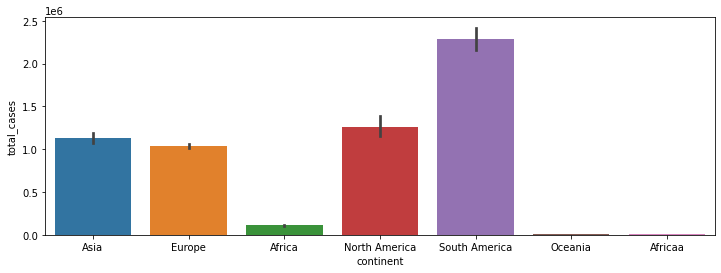

In [14]:
fig = plt.figure(figsize = (12,4))
sns.barplot(x = alldata.continent, y = alldata.total_cases)
plt.show()

I choose "continent" to represent the total cases, I was wondering what kind of country will solve the problem better. According to the graph above, we can see that South America has most Covid cases, Oceania and Africa looks like they have least Covid cases. 

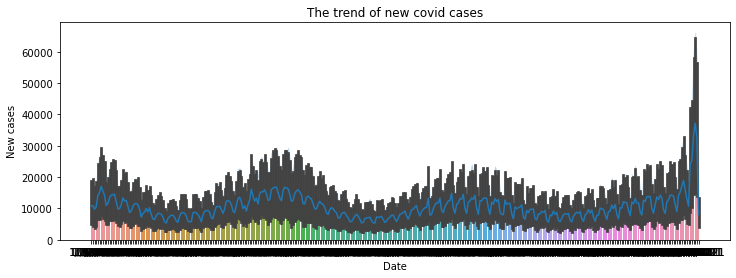

In [18]:
fig = plt.figure(figsize = (12,4))
sns.barplot(x=alldata.date,y=alldata.new_cases)
sns.lineplot(x=alldata.date,y=alldata.new_cases)

plt.title("The trend of new covid cases")
plt.xlabel("Date")
plt.ylabel("New cases")
plt.show()

I think using date to represent the new cases is important because we may know when the new type of virus will end. As we can see, Epidemic is cyclical, and the cycle change times are essentially the same so we can predict the future through these data.

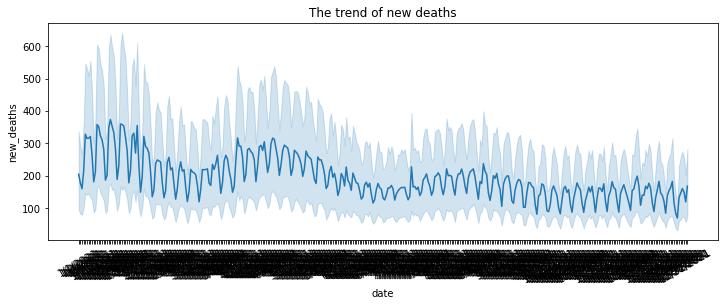

In [24]:
fig = plt.figure(figsize = (12,4))
sns.lineplot(x='date',y='new_deaths', data = alldata)
plt.xticks(rotation=30)
plt.title("The trend of new deaths")
plt.show()

I think analyze the trend of new death is important because we can know how serious the new virus is. According to the graph above, we can see that the number of new deaths is decreasing with time, so it may tell us that new type of virus may not be too dangerous.

***
## Section: 2.6 - Verify data quality: explain any missing values, duplicate data, or outliers.
- What, if anything, do you need to do about these? Be specific.
***

- For the missing values: If there are few missing values, we can delet these cells. But if there are lots of missing values, I think the best way is to fill them with the most probable value, using Bayesian formula or decision tree. 
- For the duplicate data: I think we should remove the duplicate data because they may bias the fitted model, such as lead to the model overfitting.
- For the outliers, I think we should keep these outliers because we don't know why these outliers come up, are they mistakes or they are truely exist? If we delet those outliers, it may effect our model and we will have wrong conclusion.

***
## Section: 2.7 - Explore the relationships among the attributes.
- Exclude the class attribute, if there is one.
- Use scatter plots, correlation matrices, cross-tabulations, group-wise averages, or other appropriate techniques. Explain and interpret any interesting relationships.
***

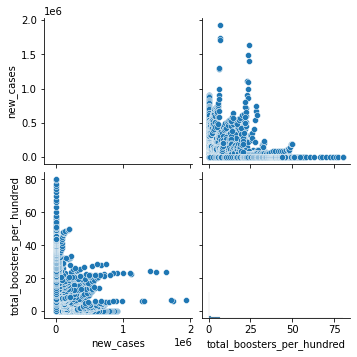

In [10]:
sns.pairplot(alldata, vars = ['new_cases','total_boosters_per_hundred'])
plt.show()

According to the graphs above, we can see that the more boosters per hundred, the less new cases, so it can show us that boosters are useful for Covid-19.

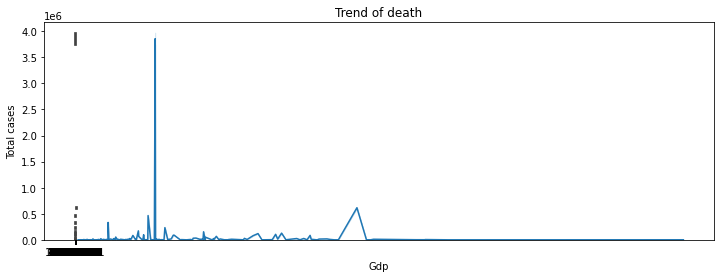

In [39]:
fig = plt.figure(figsize = (12,4))
sns.barplot(x=alldata.gdp_per_capita,y=alldata.total_deaths)
sns.lineplot(x=alldata.gdp_per_capita,y=alldata.total_deaths)

plt.title("Trend of death")
plt.xlabel("Gdp")
plt.ylabel("Total cases")
plt.show() 

According to the graph above, we can see that with high gdp per capita, the less death. So we may need to give more medical service to those poor area to help them against this epidemic.

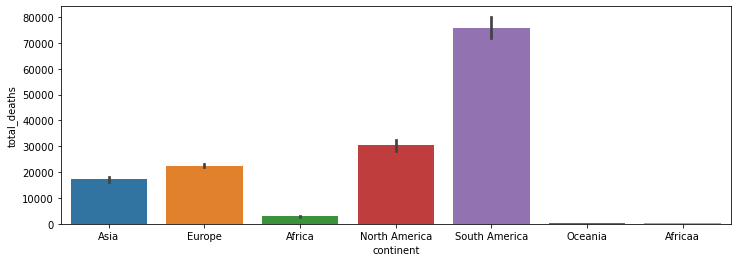

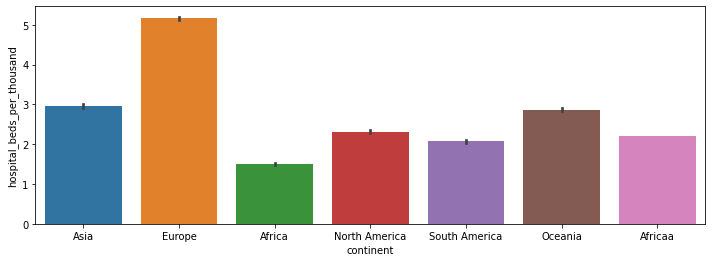

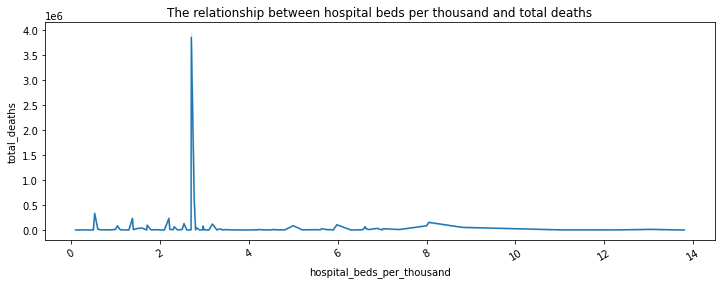

In [38]:
fig = plt.figure(figsize = (12,4))
sns.barplot(x = alldata.continent, y = alldata.total_deaths)
plt.show()

fig = plt.figure(figsize = (12,4))
sns.barplot(x = alldata.continent, y = alldata.hospital_beds_per_thousand)
plt.show()

fig = plt.figure(figsize = (12,4))
sns.lineplot(x='hospital_beds_per_thousand',y='total_deaths', data = alldata)
plt.xticks(rotation=30)
plt.title("The relationship between hospital beds per thousand and total deaths")
plt.show()

Through the graphs above, we can see that South America has more death and their hospital beds per thousand is low. By analyzing the last graph, we can see that before 3 in x-axis, the number of death is more, so more hospital beds per thousands means better medical servecie, also means less death.

***
## Section: 2.8 - Identify and explain any interesting relationships between the class attribute and the other attributes.
- If there is no class attribute, this section is N/A.
- You may refer to earlier visualizations or create new ones.
***

N/A

***
# Section: 3 - Data Preparation
- Based on the insights gleaned in the data understanding phase, determine what type of preparation that you would like to do to create a final dataset to be used for future modeling, and perform the preparation.
- One of the final outputs of your program should be the creation of a dataset (can be in the format of a Python/Pandas dataframe) which has all of the attributes you would like to use for the modeling phase of a project, as well as dealing with any outliers, noise or missing values.
***

***
## Section: 3.1 - What data preparation do you intend to do? Please justify.
- Add or remove attributes?
- Clean attribute values?
- Transform attributes?
- Create new attributes?
***

There are some attributes should be removed: 
- 'tests_per_case', 'tests_units'(We have similar attributes before);
- 'total_vaccinations'(We have people_vaccinated);
- 'new_people_vaccinated_smoothed'(We have new_vaccinations_smoothed);
- 'new_people_vaccinated_smoothed_per_hundred'(We have new_vaccinations_smoothed_per_million);
- 'aged_70_older'(We have aged_65_older);
- 'excess_mortality_cumulative'(We have excess_mortality_cumulative_absolute).


There are some attribute values are unreasonable large/small, duplicate, we need to drop these data because they are useless.

I think we don't need to transform and create new attributes.

There's a duplicate attribute, 'Africaa', should be merged with 'Africa'.


***
## Section: 3.2 - Perform the data preparation.
- Perform the steps in an order that makes sense for this dataset.  (e.g., Sometimes it might be better to remove, transform, add individual attributes first, then clean up values; sometimes the reverse might be true.)
- Describe **what** you are doing and **why** at each step.
- **NOTE:** This may be a lengthy section.  For clarity, please **partition this section into smaller sections** by adding **level-3 subsections**.  Follow the EXAMPLE section header template below.  Number the level-3 subsections in order, consistent with the overall section numbering.
***

***
### Section: 3.2.1 - EXAMPLE level-3 subsection. Part I
- Delet some attributes which there exist other similar one.
***

In [40]:
to_drop = ['tests_per_case', 
           'total_vaccinations', 
           'new_people_vaccinated_smoothed', 
           'new_people_vaccinated_smoothed_per_hundred',
           'aged_70_older',
           'excess_mortality_cumulative']

alldata.drop(to_drop,inplace = True, axis = 1)

***
### Section: 3.2.1 - EXAMPLE level-3 subsection. Part II
- Rename attribute 'Africaa' to 'Africa'. Deal with missing value.
***



In [89]:
alldata = alldata.drop(alldata.index[16502])

In [55]:
#Filling the missing value with mean value.
updated_alldata = alldata
updated_alldata=updated_alldata.fillna(updated_alldata.mean())
updated_alldata=updated_alldata.fillna(updated_alldata.mean())
updated_alldata.info()

/var/folders/2j/4q16n9mn3gb47m4zzzwv4wzh0000gn/T/ipykernel_23021/1257819106.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  updated_alldata=updated_alldata.fillna(updated_alldata.mean())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84644 entries, 0 to 84643
Data columns (total 62 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   RECID                                    84644 non-null  int64  
 1   iso_code                                 84644 non-null  object 
 2   continent                                79899 non-null  object 
 3   location                                 84643 non-null  object 
 4   date                                     84644 non-null  object 
 5   total_cases                              84644 non-null  float64
 6   new_cases                                84644 non-null  float64
 7   new_cases_smoothed                       84644 non-null  float64
 8   total_deaths                             84644 non-null  float64
 9   new_deaths                               84644 non-null  float64
 10  new_deaths_smoothed                      84644

/var/folders/2j/4q16n9mn3gb47m4zzzwv4wzh0000gn/T/ipykernel_23021/1257819106.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  updated_alldata=updated_alldata.fillna(updated_alldata.mean())


***
### Section: 3.2.1 - EXAMPLE level-3 subsection. Part III
- Deal with outliers.
***

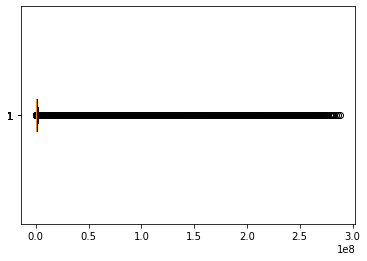

In [69]:
# detecting the outliers
plt.boxplot(alldata.total_cases, vert=False)
plt.boxplot(alldata.new_cases, vert=False)
plt.boxplot(alldata.new_cases_smoothed, vert=False)
plt.boxplot(alldata.total_deaths, vert=False)
plt.boxplot(alldata.new_deaths, vert=False)
plt.boxplot(alldata.new_deaths_smoothed  , vert=False)
plt.boxplot(alldata.total_cases_per_million, vert=False)
plt.boxplot(alldata.new_cases_per_million , vert=False)
plt.boxplot(alldata.new_cases_smoothed_per_million , vert=False)
plt.boxplot(alldata.total_deaths_per_million, vert=False)
plt.boxplot(alldata.new_deaths_per_million   , vert=False)
plt.boxplot(alldata.new_deaths_smoothed_per_million    , vert=False)
plt.boxplot(alldata.reproduction_rate   , vert=False)
plt.boxplot(alldata. icu_patients , vert=False)
plt.boxplot(alldata.icu_patients_per_million  , vert=False)
plt.boxplot(alldata. hosp_patients  , vert=False)
plt.boxplot(alldata.hosp_patients_per_million , vert=False)
plt.boxplot(alldata.weekly_icu_admissions  , vert=False)
plt.boxplot(alldata.weekly_icu_admissions_per_million, vert=False)
plt.boxplot(alldata.weekly_hosp_admissions , vert=False)
plt.boxplot(alldata.new_cases_smoothed, vert=False)
plt.boxplot(alldata.weekly_hosp_admissions_per_million, vert=False)
plt.boxplot(alldata.new_tests   , vert=False)
plt.boxplot(alldata.total_tests    , vert=False)
plt.boxplot(alldata.total_tests_per_thousand    , vert=False)
plt.boxplot(alldata.new_tests_per_thousand   , vert=False)
plt.boxplot(alldata.new_tests_smoothed    , vert=False)
plt.boxplot(alldata.new_tests_smoothed_per_thousand  , vert=False)
plt.boxplot(alldata.positive_rate   , vert=False)
plt.boxplot(alldata.people_vaccinated     , vert=False)
plt.boxplot(alldata.people_fully_vaccinated       , vert=False)
plt.boxplot(alldata.total_boosters , vert=False)
plt.boxplot(alldata.new_vaccinations   , vert=False)
plt.boxplot(alldata. new_vaccinations_smoothed     , vert=False)
plt.boxplot(alldata.total_vaccinations_per_hundred   , vert=False)
plt.boxplot(alldata.people_vaccinated_per_hundred       , vert=False)
plt.boxplot(alldata.people_fully_vaccinated_per_hundred   , vert=False)
plt.boxplot(alldata. total_boosters_per_hundred        , vert=False)
plt.boxplot(alldata.new_vaccinations_smoothed_per_million    , vert=False)
plt.boxplot(alldata.stringency_index         , vert=False)
plt.boxplot(alldata.population     , vert=False)
plt.boxplot(alldata. population_density   , vert=False)
plt.boxplot(alldata.  median_age       , vert=False)
plt.boxplot(alldata. aged_65_older     , vert=False)
plt.boxplot(alldata.gdp_per_capita       , vert=False)
plt.boxplot(alldata. extreme_poverty       , vert=False)
plt.boxplot(alldata.  cardiovasc_death_rate      , vert=False)
plt.boxplot(alldata. diabetes_prevalence     , vert=False)
plt.boxplot(alldata. female_smokers          , vert=False)
plt.boxplot(alldata.male_smokers, vert=False)
plt.boxplot(alldata.handwashing_facilities       , vert=False)
plt.boxplot(alldata.  hospital_beds_per_thousand             , vert=False)
plt.boxplot(alldata.life_expectancy   , vert=False)
plt.boxplot(alldata. human_development_index     , vert=False)
plt.boxplot(alldata.  excess_mortality_cumulative_absolute             , vert=False)
plt.boxplot(alldata.excess_mortality    , vert=False)
plt.boxplot(alldata.excess_mortality_cumulative_per_million   , vert=False)

In [83]:
#Using  replace the outliers n the upper side with 95% percentile value and outlier on the lower side with 5% percentile.
import scipy.stats
scipy.stats.mstats.winsorize(alldata['total_cases'],limits = 0.05)
scipy.stats.mstats.winsorize(alldata['new_cases'],limits = 0.05)
scipy.stats.mstats.winsorize(alldata['weekly_icu_admissions_per_million'],limits = 0.05)
scipy.stats.mstats.winsorize(alldata['weekly_hosp_admissions_per_million'],limits = 0.05)
scipy.stats.mstats.winsorize(alldata['total_vaccinations_per_hundred'],limits = 0.05)
scipy.stats.mstats.winsorize(alldata['population'],limits = 0.05)
scipy.stats.mstats.winsorize(alldata['cardiovasc_death_rate'],limits = 0.05)
scipy.stats.mstats.winsorize(alldata['handwashing_facilities'],limits = 0.05)
scipy.stats.mstats.winsorize(alldata['life_expectancy'],limits = 0.05)
scipy.stats.mstats.winsorize(alldata['excess_mortality'],limits = 0.05)



masked_array(data=[nan, nan, nan, ..., nan, nan, nan],
             mask=False,
       fill_value=1e+20)

***
## Section: 3.3 - Evaluate the data preparation.
- For the most "important" attributes/transformations, evalute the preparation by comparing the **before** and **after** data.
- Use simple tables or visualizations, and/or brief text summaries.
***

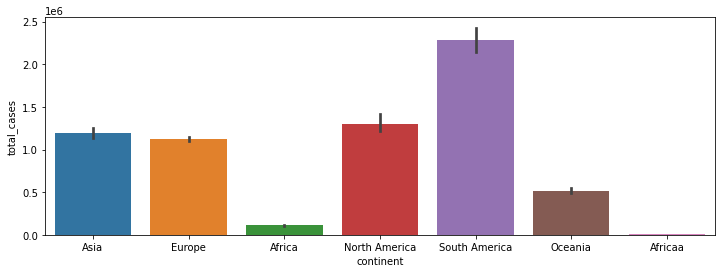

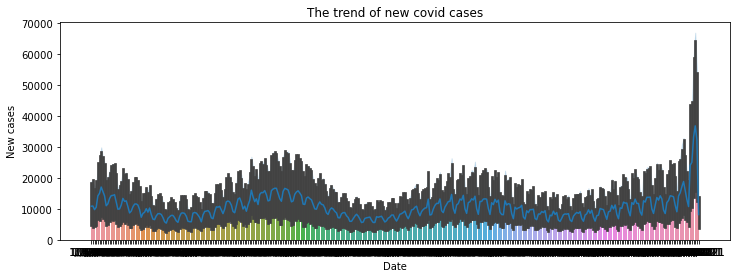

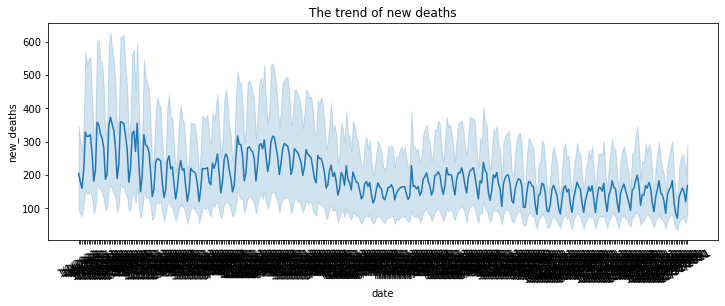

In [90]:
#sample1
fig = plt.figure(figsize = (12,4))
sns.barplot(x = alldata.continent, y = alldata.total_cases)
plt.show()

#sample2
fig = plt.figure(figsize = (12,4))
sns.barplot(x=alldata.date,y=alldata.new_cases)
sns.lineplot(x=alldata.date,y=alldata.new_cases)

plt.title("The trend of new covid cases")
plt.xlabel("Date")
plt.ylabel("New cases")
plt.show()

#sample3
fig = plt.figure(figsize = (12,4))
sns.lineplot(x='date',y='new_deaths', data = alldata)
plt.xticks(rotation=30)
plt.title("The trend of new deaths")
plt.show()

Through the graphs above, the dataset looks like same as before, the reason may be the attributes i choose is to view the whole picture of the dataset, and I used mean value to deal with all of missing values.

***
# Section: 4 - Conclusions
- What are your overall conclusions about the data?
- What did you learn?
***

Overall, these data show us that the Epidemic is cyclical; more people take boosters means less death; rich country and area will provide better medical service, incluing more handwashing facilities and beds in pospital, which will lead to less deaths.

I learn the overview of this epidemic, how seriosu it was, there're lots of areas need our help and Vaccines are really usful for people to keep health. 